In [31]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from create_dataset import createBunch

comment_line_per_code_line Java is :  0.10344827586206896
répartition :  149 182 227 90


In [18]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\thoma\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip list

## datasets 

In [32]:
# Load the Boston Housing dataset
code_metrics = createBunch()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(code_metrics.data, code_metrics.target, test_size=0.2, random_state=12345)


## Random Forest 

In [33]:
# Random Forest Regressor
reg_rf = RandomForestRegressor(n_estimators=100, random_state=12345)
reg_rf.fit(X_train, y_train)
y_pred_rf = reg_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
cv_scores_rf = cross_val_score(reg_rf, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_rf)

# Print the results
print("Random Forest cross-validation mean squared error: {:.3f}".format(mse))
print("Random Forest Regressor MSE: {:.3f}".format(mse_rf))
print(cv_scores_rf)

Random Forest cross-validation mean squared error: 0.249
Random Forest Regressor MSE: 0.220
[-0.28892238 -0.22202135 -0.21592737 -0.28549926 -0.23139117]


## Linear Regression

In [34]:
# Initialize the model
reg_lr = LinearRegression()

# Fit the model
reg_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = reg_lr.predict(X_test)

# Calculate the mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
cv_scores_lr = cross_val_score(reg_lr, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_lr)

# Print the results
print("Linear Regression cross-validation mean squared error: {:.3f}".format(mse))
print("Linear Regression mean squared error: {:.3f}".format(mse_lr))


Linear Regression cross-validation mean squared error: 0.317
Linear Regression mean squared error: 0.294


## Neurol networks 

In [38]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=X_train.shape[1:], activation="relu"))
    Dropout(0.5)
    model.add(Dense(32, activation="relu"))
    Dropout(0.5)
    model.add(Dense(1))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

# Create the KerasRegressor object
keras_reg = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Perform cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=12345)
cv_scores_nn = cross_val_score(keras_reg, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Calculate the mean squared error
mse = -np.mean(cv_scores_nn)

# Print the result
print("Neural Network cross-validation mean squared error: {:.3f}".format(mse))

# Train the model
history = keras_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = -keras_reg.score(X_test, y_test)
print("Test loss:", loss)


C:\Users\hp\AppData\Local\Temp\ipykernel_8408\4280635107.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_fn=create_model, epochs=10, batch_size=32, verbose=0)


Neural Network cross-validation mean squared error: 0.798
Test loss: 0.8447264432907104


## comparing models after cross-validation 

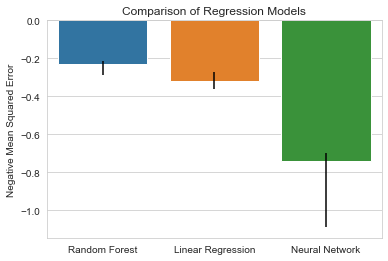

In [39]:
# convert the scores to absolute values
rf_scores = np.abs(cv_scores_rf)
lin_scores = np.abs(cv_scores_lr)
nn_scores = np.abs(cv_scores_nn)

# compute the summary statistics for each model
rf_median = np.median(cv_scores_rf)
rf_min = np.min(cv_scores_rf)
rf_max = np.max(cv_scores_rf)

lin_median = np.median(cv_scores_lr)
lin_min = np.min(cv_scores_lr)
lin_max = np.max(cv_scores_lr)

nn_median = np.median(cv_scores_nn)
nn_min = np.min(cv_scores_nn)
nn_max = np.max(cv_scores_nn)

# create a barplot of the results
sns.set_style('whitegrid')
sns.barplot(x=['Random Forest', 'Linear Regression', 'Neural Network'],
            y=[rf_median, lin_median, nn_median],
            yerr=[[rf_median - rf_min, lin_median - lin_min, nn_median - nn_min],
                  [rf_max - rf_median, lin_max - lin_median, nn_max - nn_median]],
            capsize=10)
plt.title('Comparison of Regression Models')
plt.ylabel('Negative Mean Squared Error')
plt.show()